# **Chapter 4 - THE PRELIMINARIES: A CRASHCOURSE**

## **4.4 Probability and Statistics**

#### **4.4.1 Basic probability theory**

- 육면체 주사위는 1,2,3 ...6 의 6가지 사건이 존재하고, 일반적으로 각 눈금이 나올 확률은 1/6

- 공장에서 갇 나온 육면체 주사위는 비정상적인 주사위인지는 알지 못한다.<br>
  유일한 확인 방법은 여러번 주사위를 굴려가며 그 결과를 기록하여 조사하는 것이다.

- 기본적인 접근 방법은 각 눈금의 누적 횟수를 총 굴린 횟수로 나누는 방법. 이 방법으로 확률을 추정할 수 있다.<br>
  **대수의 법칙** 에 따라, 던진 횟수가 많아질수록 우리가 처음에 가정한 확률에 가까워질 것이다.<br>
  

- **대수의 법칙** : 모집단에서 임의로 뽑은 표본의 평균은 표본의 크기가 커질수록 전체 모집단에 평균에 근사한다.
  

In [1]:
%matplotlib inline
from IPython import display
import numpy as np
from mxnet import nd
import math
from matplotlib import pyplot as plt
import random

- 통계에서는 확률 분포에서 샘플을 뽑는 것을 **_sampling_** 이라고 함. 

- 연속되지 않은 선택들에 확률이 부여된 분포를 우리는 **_multinomial distribution._** 라고 함.<br>
  여러 개의 값을 가질 수 있는 독립 확률변수들에 대한 확률분포. 여러 번의 독립시행에서 각각의 값이 특정 횟수가 나타날 확률을 말합니다.

- 추후 분포에 대해 정식적으로 다뤄짐...

In [2]:
# 각 주사위 눈금이 나올 확률
probabilities = nd.ones(6) / 6

# nd.random.multinomial 함수를 통해, 다항분포를 통해서 Sampling 할 수 있다.
probabilities, nd.random.multinomial(probabilities)

(
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 <NDArray 6 @cpu(0)>, 
 [3]
 <NDArray 1 @cpu(0)>)

In [3]:
# 주사위 10 번 샘플링
print(nd.random.multinomial(probabilities, shape=(10)))

# 주사위 50 번 샘플링. 자료형을 5, 10 shape 로 표현.
print(nd.random.multinomial(probabilities, shape=(5,10)))


[3 4 5 3 5 3 5 2 3 3]
<NDArray 10 @cpu(0)>

[[2 2 1 5 0 5 1 2 2 4]
 [4 3 2 3 2 5 5 0 2 0]
 [3 0 2 4 5 4 0 5 5 5]
 [2 4 4 2 3 4 4 0 4 3]
 [3 0 3 5 4 3 0 2 2 1]]
<NDArray 5x10 @cpu(0)>


In [6]:
# 주사위 1000 번 샘플링 결과.
rolls = nd.random.multinomial(probabilities, shape=(1000))

# 주사위 샘플링 결과별 count. 누적 과정을 기록하기 위한 변수
counts = nd.zeros((6,1000))

# 주사위 샘플링 결과별 누적 count 를 구하기 위한 변수
totals = nd.zeros(6)

# 주사위의 각 눈금이 몇 번 나왔는지, 그 과정과 누적 횟수를 구함.
for i, roll in enumerate(rolls):
    totals[int(roll.asscalar())] += 1
    counts[:, i] = totals

In [7]:
# 1000 번 굴렸으므로 1000으로 나누면 각 눈금별 확률이 나옴.
totals, totals / 1000

(
 [167. 168. 175. 159. 158. 173.]
 <NDArray 6 @cpu(0)>, 
 [0.167 0.168 0.175 0.159 0.158 0.173]
 <NDArray 6 @cpu(0)>)

In [8]:
counts


[[  0.   0.   0. ... 165. 166. 167.]
 [  1.   1.   1. ... 168. 168. 168.]
 [  0.   0.   0. ... 175. 175. 175.]
 [  0.   0.   0. ... 159. 159. 159.]
 [  0.   1.   2. ... 158. 158. 158.]
 [  0.   0.   0. ... 173. 173. 173.]]
<NDArray 6x1000 @cpu(0)>

In [9]:
# 결과별 확률값을 구하기 위한 각 샘플링 횟수
x = nd.arange(1000).reshape((1,1000)) + 1

# 1000 번까지 샘플링하여 각 결과별 확률값의 기록
estimates = counts / x

# 확률값이 점점 균일해지는 것을 확인할 수 있다.
print(estimates[:,0])
print(estimates[:,1])
print(estimates[:,100])
print(estimates[:, 999])


[0. 1. 0. 0. 0. 0.]
<NDArray 6 @cpu(0)>

[0.  0.5 0.  0.  0.5 0. ]
<NDArray 6 @cpu(0)>

[0.1980198  0.15841584 0.17821783 0.18811882 0.12871288 0.14851485]
<NDArray 6 @cpu(0)>

[0.167 0.168 0.175 0.159 0.158 0.173]
<NDArray 6 @cpu(0)>


In [10]:
# Save to the d2l package.
def use_svg_display():
    """Use the svg format to display plot in jupyter."""
    display.set_matplotlib_formats('svg')

# Save to the d2l package.
def set_figsize(figsize=(3.5, 2.5)):
    """Change the default figure size"""
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

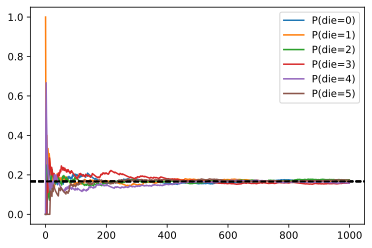

In [11]:
### 각 주사위 눈금이 나올 확률. 샘플링 횟수를 거듭할수록 0.167 값을 향해 균일해짐을 알 수 있다.
set_figsize((6, 4))

for i in range(6):
    plt.plot(estimates[i, :].asnumpy(), label=("P(die=" + str(i) +")"))
    plt.axhline(y=0.16666, color='black', linestyle='dashed')
    plt.legend();

There are a few important axioms of probability that you'll want to remember:

* 어떤 사건에 대한 확률값은 절대 음수가 아님. <br> 
  $\Pr(Z=z) \geq 0$. <br><br>
* 두 개의 이벤트 $Z=z$ and $X=x$ 의 합집합에 대한 확률은, 각 이벤트 확률의 합보다 클 수 없다. <br> $\Pr(Z=z \cup X=x) \leq \Pr(Z=z) + \Pr(X=x)$.<br><br>
* 어떤 확률 변수에서, 모든 값들의 확률의 합은 1 <br>
  $\sum_{i=1}^n \Pr(Z=z_i) = 1$.<br><br>
* 상호 베타적인 이벤트 $Z=z$ and $X=x$ 에 대해, 두 이벤트의 합집합에 대한 확률은 각 사건의 확률의 합과 같다, <br> 
  $\Pr(Z=z \cup X=x) = \Pr(Z=z) + \Pr(X=x)$.<br><br>

#### **4.4.2 Dealing with multiple random variables**

- **conditional probability**<br>
  $B$ 가 일어났을 때 $A$가 일어날 확률, $\Pr(A | B)$<br><br>

- **conditional probability 그림 설명** : 사건 $B$가 사실이므로 모든 가능한 표본은 사건 $B$에 포함되어야 한다. **즉, 새로운 실질적 표본공간은  $Ω_{new}$→$𝐵$ 가 된다.**<br>
  새로운 사건 $A_{new}$의 원소는 동시에 $A$, $B$ 사건의 원소가 되야함.($A∩B$) **즉, 새로운 실질적  $ A_{new} $ → $A ∩ B$ 가 된다.**<br><br>
  따라서 $P(A|B)$ 는 사건 $A_{new}$의 확률 즉, $A,B$ 의 결합확률을 새로운 표본공간 $B$ 에서의 확률로 정규화(normalize)한 값이라고 할 수 있다.<br><br>
  $$P(A|B) = \frac{P(A_{new})}{P(Ω_{new})} = \frac{P(A,B)}{P(B)}$$

<img src="img/jc_pb.png">

- **dependence vs. independence**<br>
  독립 사건일 경우 다음 공식이 성립   $$\Pr(A, B) = \Pr(A) \times \Pr(B)$$<br>
  $$\Pr(A | B) = \frac{\Pr(A,B)}{\Pr(B)} = \frac{\Pr(A) \times \Pr(B)} {\Pr(B)} = \Pr(A)$$<br>
  $\Pr(A | B) = \Pr(A)$ 혹은 $\Pr(B | A) = \Pr(B)$ 를 만족하면 --> **_independence_** <br>
  
  위가 아닌 것들은 --> **_dependence_** <br>

- **Bayes’ theorem**<br>
  조건부 확률의 정의를 이용하여 다음 식을 유도할 수 있다.<br><br> 
  $\Pr(A|B) = \frac{\Pr(A,B)}{\Pr(B)}$  ,  $\Pr(B|A) = \frac{\Pr(A,B)}{\Pr(A)}$ <br><br>
  $\Pr(A, B) = \Pr(B | A) \Pr(A)$  ,  $\Pr(A,B) = \Pr(A | B) \Pr(B)$<br>

$$\Pr(A | B) = \frac{\Pr(B | A) \Pr(A)}{\Pr(B)}$$

#### **4.4.3 Conditional independence** 

In [11]:
#### 4.4.3 Conditional independence 

#### **4.4.4 Sampling** 

- 확률모델을 통해 데이터로 부터 분포를 알수도 있지만, 분포를 이용하여 데이터를 생성할 수도 있다.<br>
  랜덤한 숫자를 생성하는 가장 간단한 방법은 python 의 random 패키지의 randmom 함수를 이용하는 것이다.

In [12]:
for i in range(10):
    print(random.random())

0.9273504426102566
0.8221166519770495
0.9356598113239067
0.5642149804943078
0.7013873050372973
0.6328811375981306
0.5998684271351669
0.7137201646453788
0.722888156835147
0.9325197517432787


##### **Uniform Distribution**

- random 함수를 이용하면 기본적으로 0 에서 부터 1 까지 균등분포 방식으로 소수들이 생성됨. <br>
  random 함수는 임의의 int 값을 int 값의 maximum range 로 나눈 수를 생성함.

- random 함수를 이용하면 기본적으로 0 에서 부터 1 까지 균등분포 방식으로 소수들이 생성됨. <br>
  random 함수는 임의의 int 값을 int 값의 maximum range 로 나눈 수를 생성함.

- 임의의 정수값을 샘플링하기 위해서는 아래 코드를 실행.<br>
  1 ~ 100 사이의 임의의 int 값을 생성함.

In [13]:
for i in range(10):
    print(random.randint(1, 100))

50
66
35
45
77
53
84
48
5
17


- 위의 이벤트가 uniform 한지 알아보기 위해서 어떻게 해야하나? <br>
  직관적으로 수없이 많이 샘플링을 시도하는 방법이 최고의 전략일 것이다. 대략 1백만번 시도하면 얼추 균등한 분포를 보이게 된다.

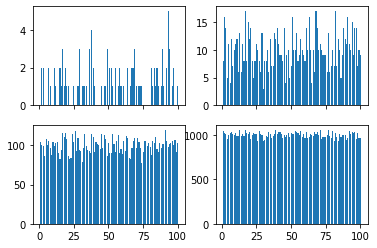

In [2]:
counts = np.zeros(100)
fig, axes = plt.subplots(2, 2, sharex=True)
axes = axes.flatten()

# Mangle subplots such that we can index them in a linear fashion rather than
# a 2D grid
for i in range(1, 100001):
    counts[random.randint(0, 99)] += 1
    
    if i in [100, 1000, 10000, 100000]:
        axes[int(math.log10(i))-2].bar(np.arange(1, 101), counts)

- 초기 값은 매우 분균등함. 수행 횟수가 어느정도 커져야지만 우리가 예상했던 균일한 분포 모양을 얻을 수 있다.

##### **The categorical distribution**

- 균일하지 않은 분포값의 예제를 위해 구부러진 동전을 던지는 예시를 들기로 함.<br>
  앞면이 나올 확률이 0.35, 뒷면이 나올 확률이 0.65 인 동전이 있다고 가정.<br>
  uniform 한 random 함수를 통해 위와 같은 이벤트를 만들기 위해, 0.35 보다 작으면 동전의 앞면 0.35 보다 같거나 크면 동전의 뒷면이라고 정의.

[0.         0.         0.33333333 ... 0.3493727  0.34937235 0.349372  ]


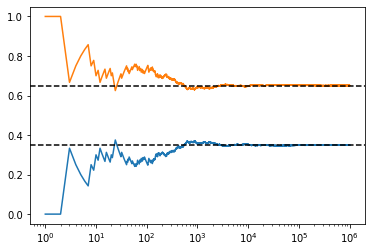

In [4]:
# Number of samples
n = 1000000
y = np.random.uniform(0, 1, n)
x = np.arange(1, n+1)

# Count number of occurrences and divide by the number of total draws
p0 = np.cumsum(y < 0.35) / x
p1 = np.cumsum(y >= 0.35) / x

print(p0)

plt.semilogx(x, p0)
plt.semilogx(x, p1)
plt.axhline(y=0.35, color='black', linestyle='dashed')
plt.axhline(y=0.65, color='black', linestyle='dashed');

##### **The Normal distribution**

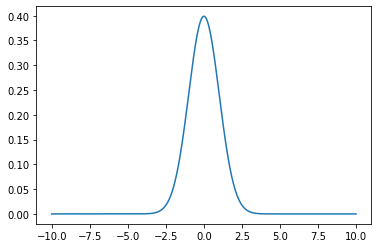

In [2]:
x = np.arange(-10, 10, 0.01)
p = (1/math.sqrt(2 * math.pi)) * np.exp(-0.5 * x**2)
plt.plot(x, p);

mean 0.9, variance 0.49


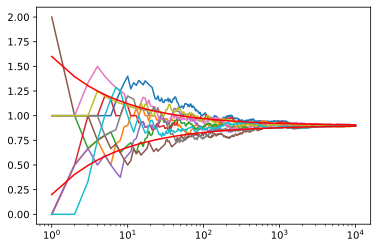

In [17]:
# Generate 10 random sequences of 10,000 uniformly distributed random variables
tmp = np.random.uniform(size=(10000,10))
x = 1.0 * (tmp > 0.3) + 1.0 * (tmp > 0.8)
mean = 1 * 0.5 + 2 * 0.2
variance = 1 * 0.5 + 4 * 0.2 - mean**2
print('mean {}, variance {}'.format(mean, variance))

# Cumulative sum and normalization
y = np.arange(1,10001).reshape(10000,1)
z = np.cumsum(x,axis=0) / y

for i in range(10):
    plt.semilogx(y,z[:,i])
    
plt.semilogx(y,(variance**0.5) * np.power(y,-0.5) + mean,'r')
plt.semilogx(y,-(variance**0.5) * np.power(y,-0.5) + mean,'r');

##### **More distributions**

- ###### **Binomial Distribution**

- ###### **Multinomial Distribution**

- ###### **Poisson Distribution**

- ###### **Beta, Dirichlet, Gamma, and Wishart Distributions**

___